이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [1]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/ToBigs22/과제/week3/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


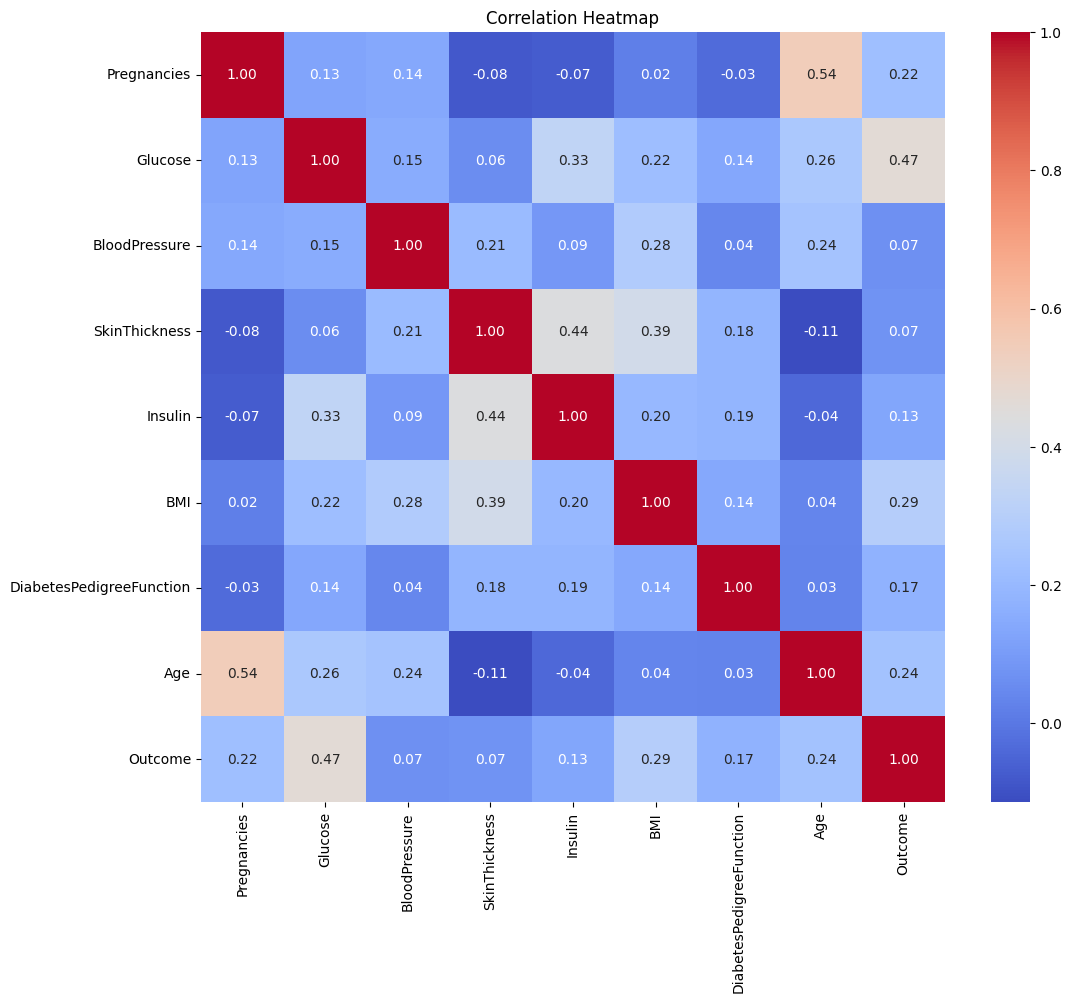

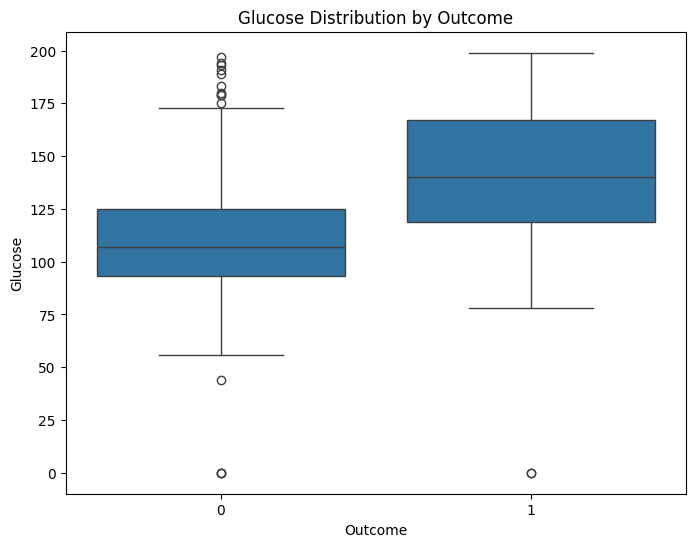

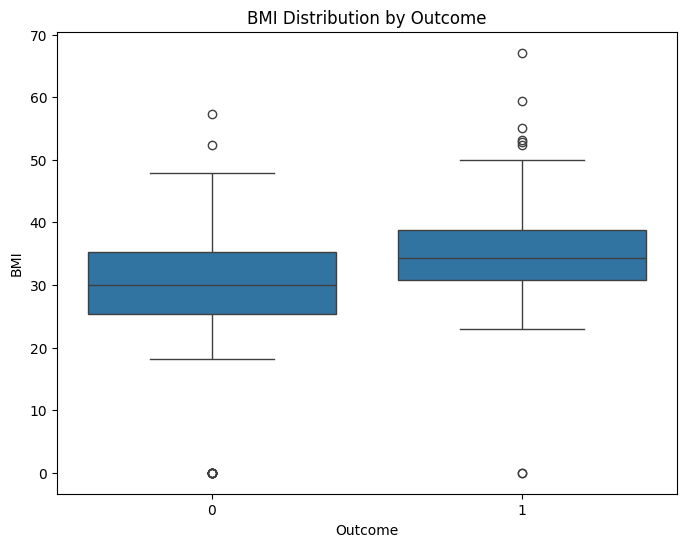

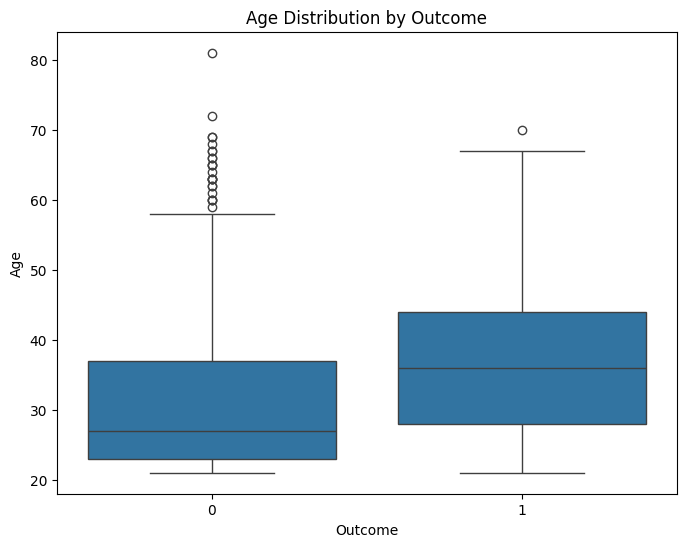

In [13]:
# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Outcome 별 주요 변수들의 분포
features = ['Glucose', 'BMI', 'Age']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} Distribution by Outcome')
    plt.show()

## 3. KNN 구현 & 파라미터 튜닝


In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_range = range(1, 21)
best_k = 0
best_metric = ''
best_score = 0
results = []

for metric in metrics:
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # 평가지표
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        results.append({
            'k': k,
            'metric': metric,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc
        })

        # update
        if accuracy > best_score:
            best_k = k
            best_metric = metric
            best_score = accuracy

results_df = pd.DataFrame(results)

## 4. 평가

In [17]:
# 결과 시각화

print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")
print(f"Best Accuracy: {best_score}")

Best K: 19
Best Metric: euclidean
Best Accuracy: 0.7445887445887446


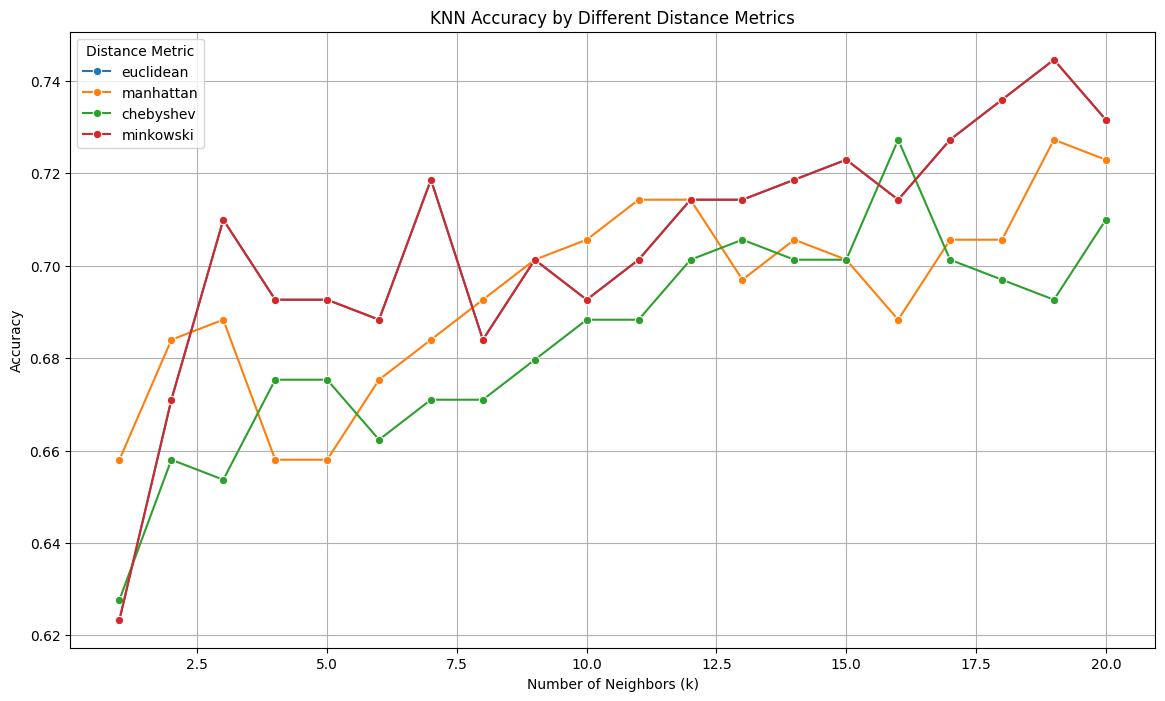

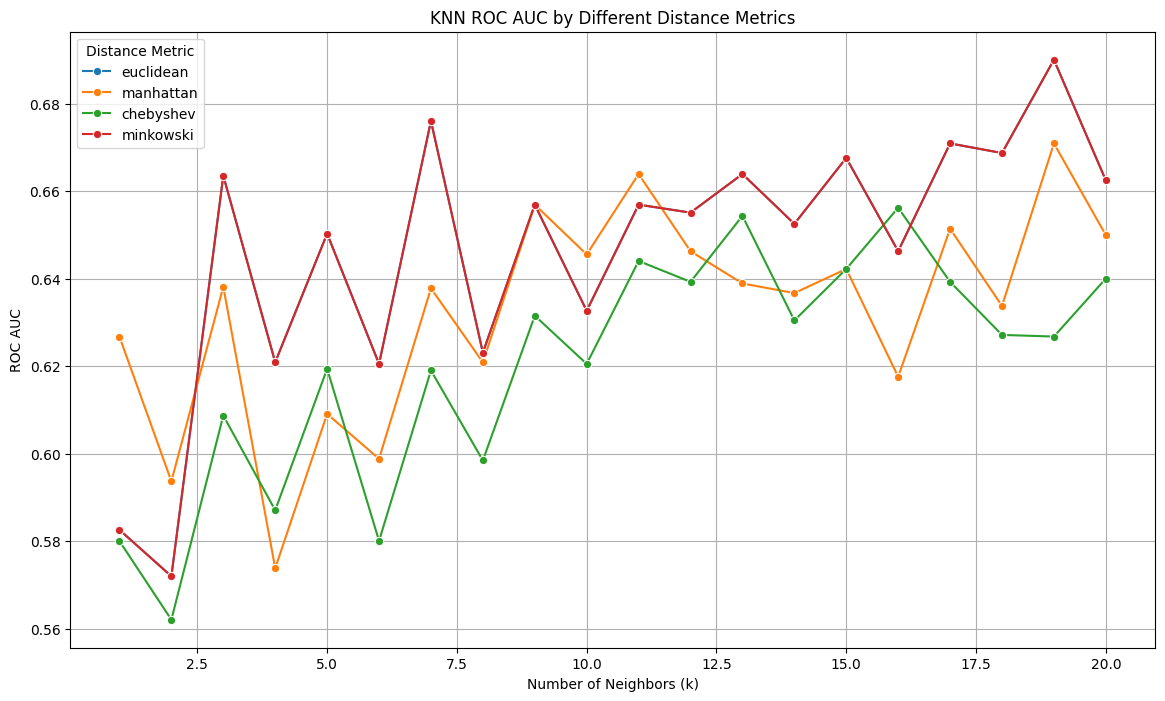

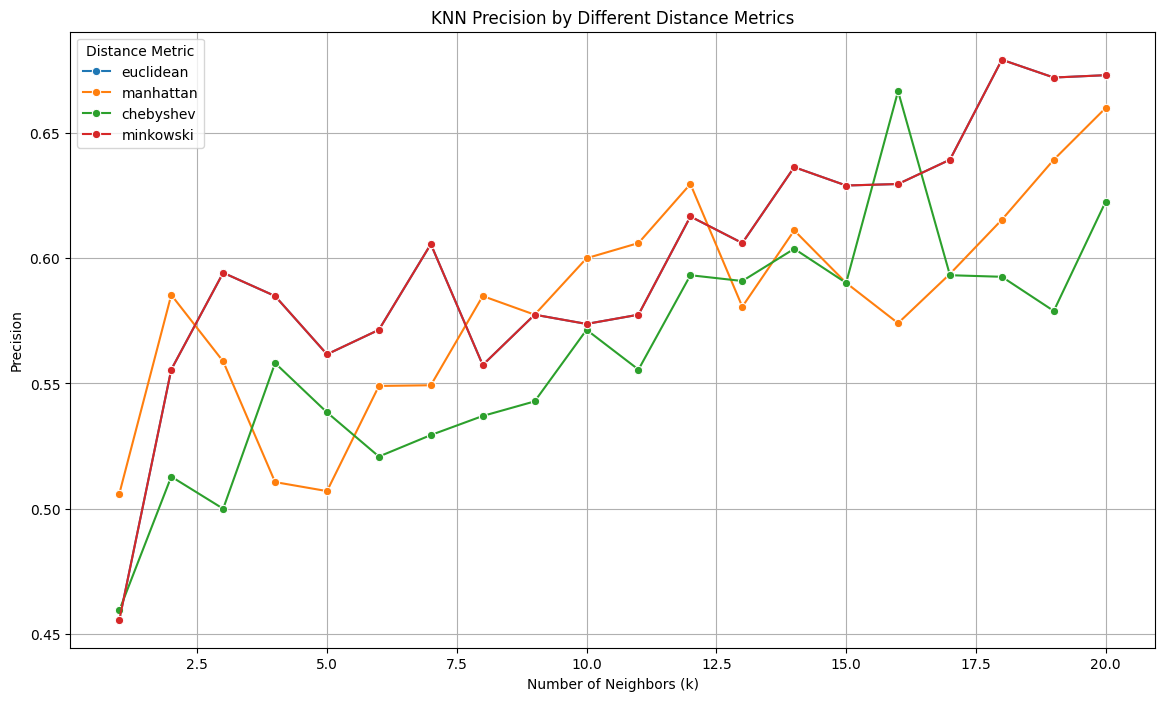

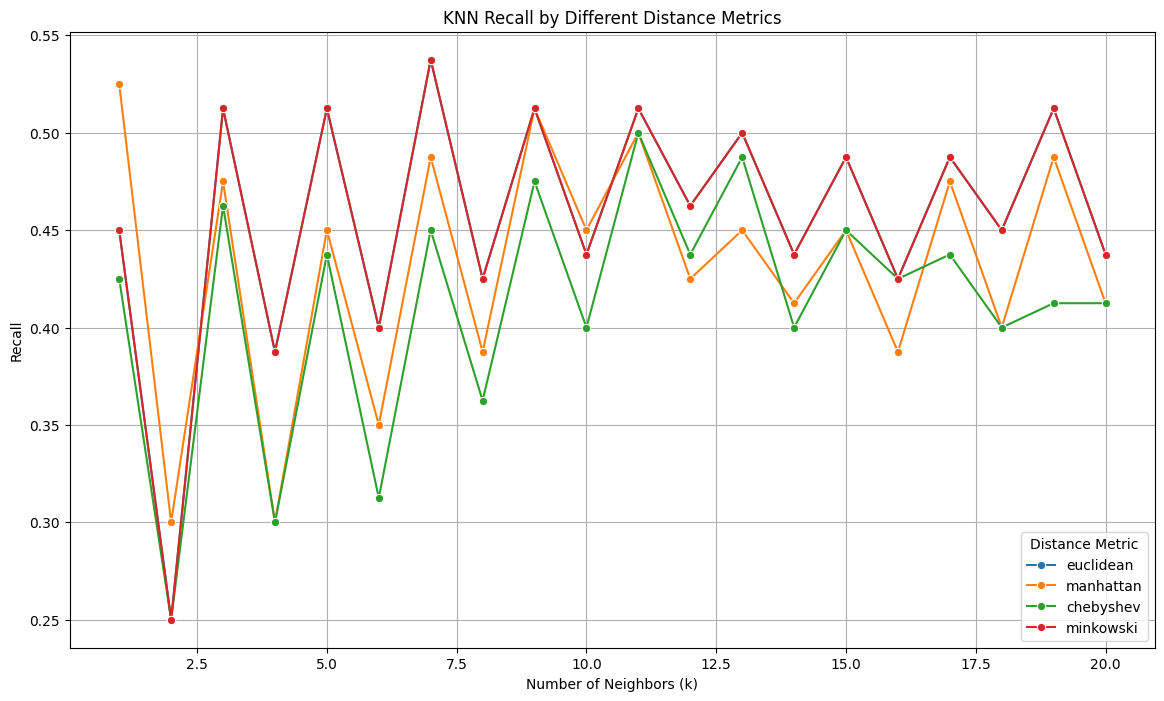

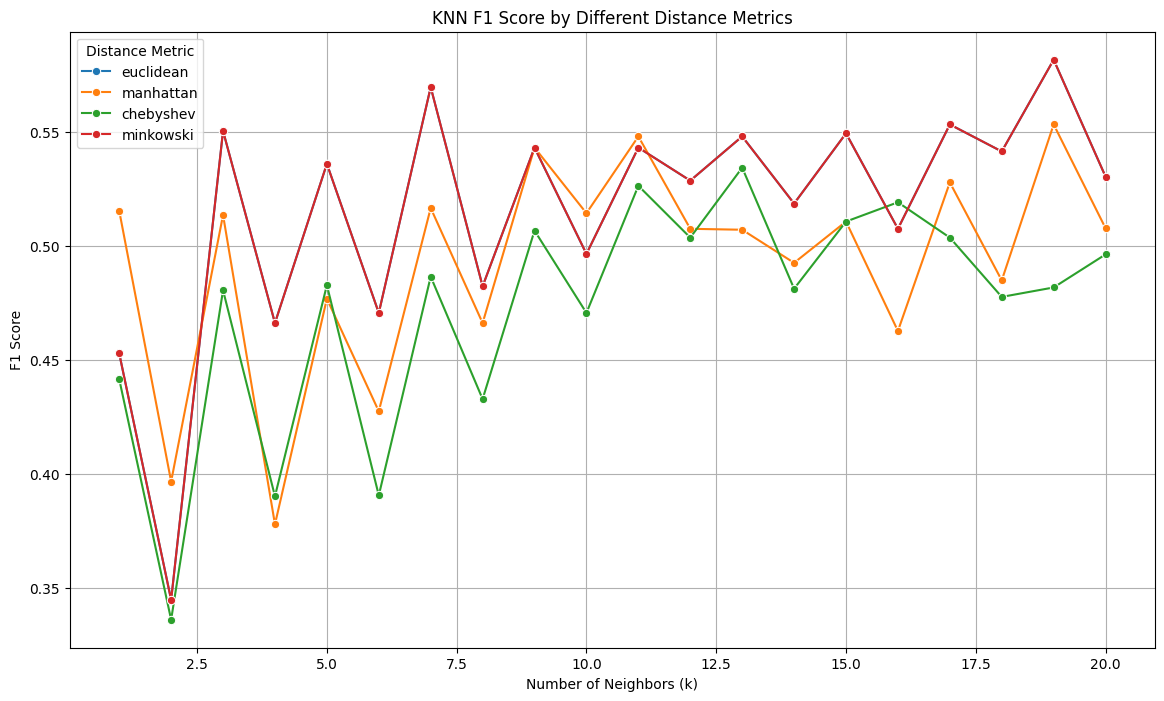

In [18]:
# Accuracy
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='k', y='accuracy', hue='metric', marker='o')
plt.title('KNN Accuracy by Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

# ROC AUC
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='k', y='roc_auc', hue='metric', marker='o')
plt.title('KNN ROC AUC by Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('ROC AUC')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

# Precision
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='k', y='precision', hue='metric', marker='o')
plt.title('KNN Precision by Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Precision')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

#Recall
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='k', y='recall', hue='metric', marker='o')
plt.title('KNN Recall by Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

# F1-Score
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='k', y='f1_score', hue='metric', marker='o')
plt.title('KNN F1 Score by Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.legend(title='Distance Metric')
plt.grid(True)
plt.show()

     k     metric  accuracy  precision  recall  f1_score   roc_auc
0    1  euclidean  0.623377   0.455696  0.4500  0.452830  0.582616
1    2  euclidean  0.670996   0.555556  0.2500  0.344828  0.572020
2    3  euclidean  0.709957   0.594203  0.5125  0.550336  0.663535
3    4  euclidean  0.692641   0.584906  0.3875  0.466165  0.620902
4    5  euclidean  0.692641   0.561644  0.5125  0.535948  0.650290
5    6  euclidean  0.688312   0.571429  0.4000  0.470588  0.620530
6    7  euclidean  0.718615   0.605634  0.5375  0.569536  0.676035
7    8  euclidean  0.683983   0.557377  0.4250  0.482270  0.623096
8    9  euclidean  0.701299   0.577465  0.5125  0.543046  0.656912
9   10  euclidean  0.692641   0.573770  0.4375  0.496454  0.632657
10  11  euclidean  0.701299   0.577465  0.5125  0.543046  0.656912
11  12  euclidean  0.714286   0.616667  0.4625  0.528571  0.655091
12  13  euclidean  0.714286   0.606061  0.5000  0.547945  0.663907
13  14  euclidean  0.718615   0.636364  0.4375  0.518519  0.65

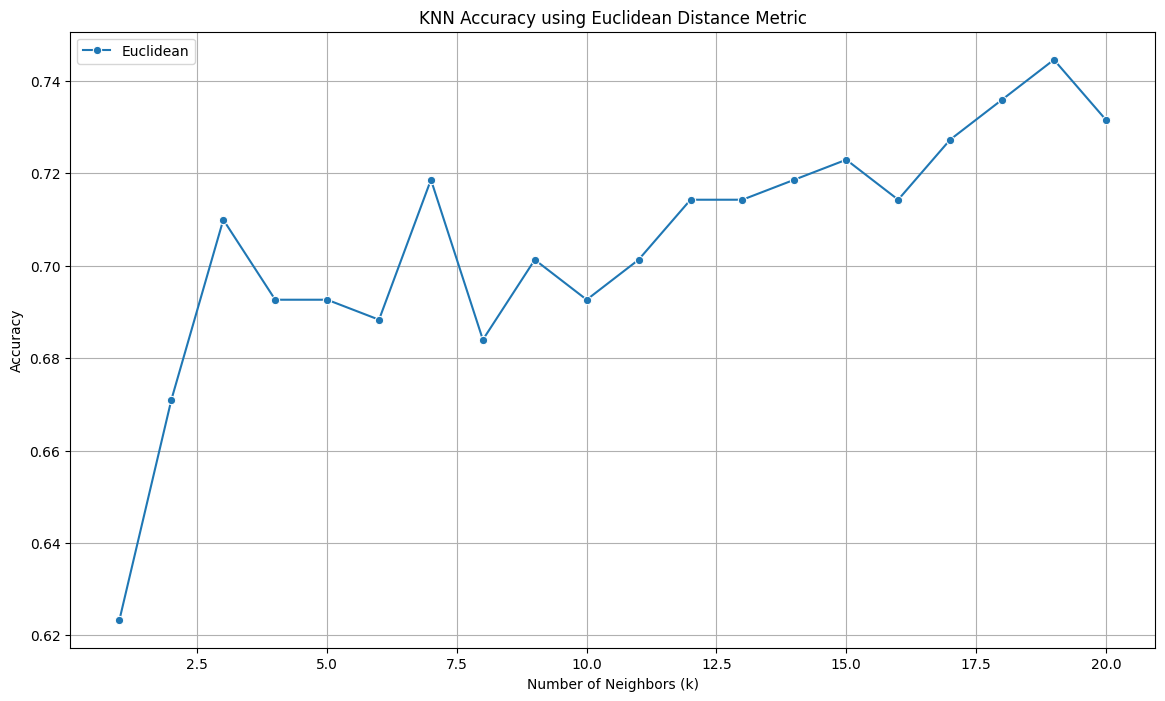

In [20]:
euclidean_results = results_df[results_df['metric'] == 'euclidean']
print(euclidean_results)

# Euclidean acc 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=euclidean_results, x='k', y='accuracy', marker='o', label='Euclidean')
plt.title('KNN Accuracy using Euclidean Distance Metric')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Euclidean, Minkowski 거리 사용한 게 acc 가 높음
# F1 score를 봤을 때 Minkowski가 k=7, 18일 때 높은 성능

---
# 2. K-Means 과제

## 1. 데이터 로드

In [32]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/ToBigs22/과제/week3/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [34]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [24]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [35]:
# 결측치 컬럼 제거
df = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,0
7048,351,12,22,349,2,0,0,0,0


In [36]:
# 정규화
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(data_scaled.head())

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.646104      0.323350    1.686879   0.482727   1.983266  0.196196   
1      -0.173192     -0.252206   -0.304144  -0.144720  -0.318454 -0.147879   
2      -0.006738      0.013089    0.129017  -0.024571   0.206938 -0.033187   
3      -0.257499     -0.252206   -0.304144  -0.231495  -0.318454 -0.147879   
4      -0.037003     -0.252206   -0.304144  -0.024571  -0.093286 -0.147879   

   num_hahas  num_sads  num_angrys  
0   0.076713  0.473570   -0.155748  
1  -0.176010 -0.152587   -0.155748  
2   0.076713 -0.152587   -0.155748  
3  -0.176010 -0.152587   -0.155748  
4  -0.176010 -0.152587   -0.155748  


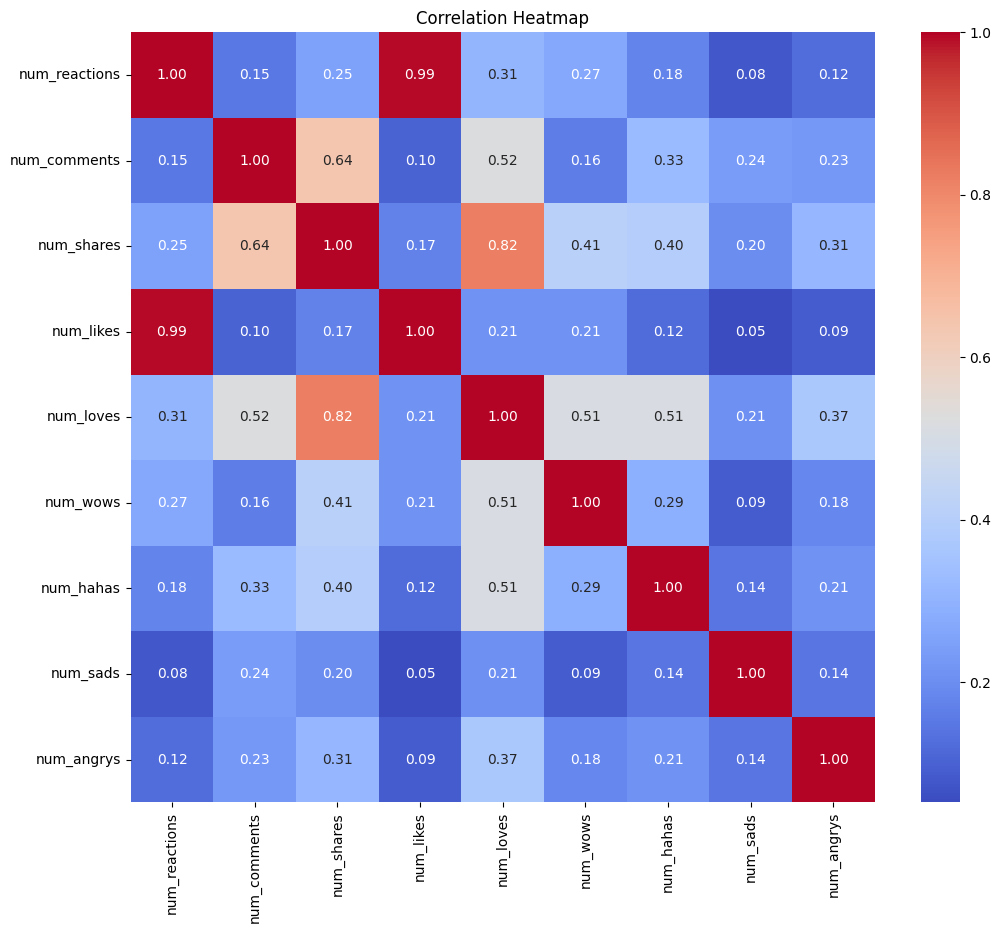

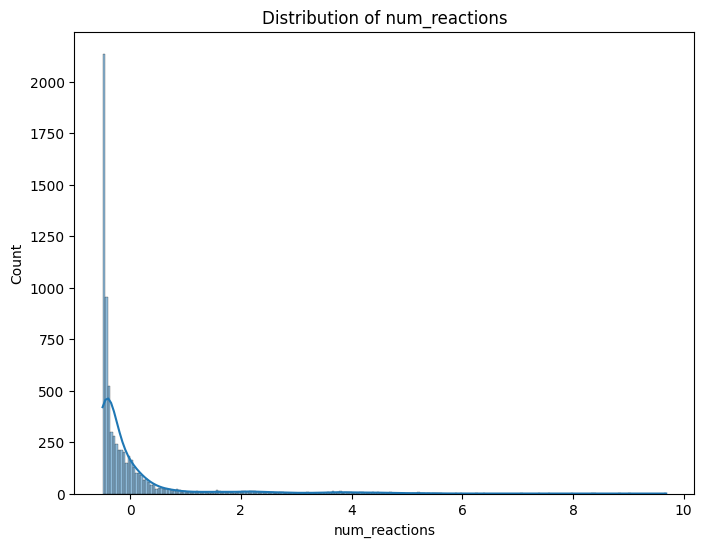

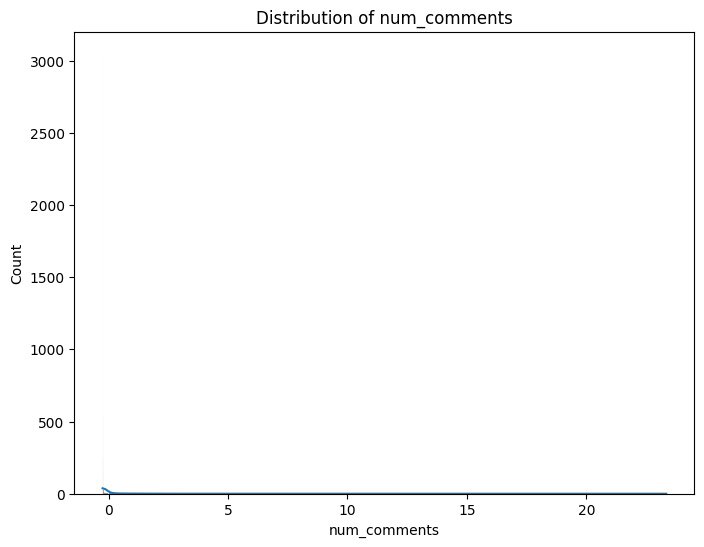

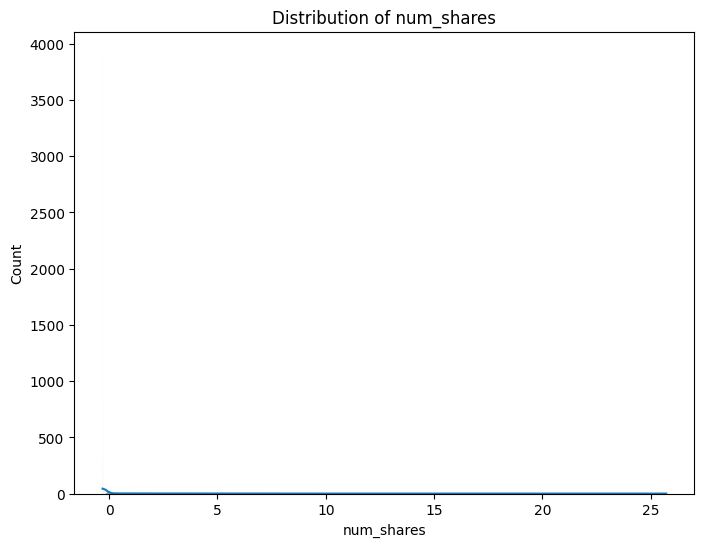

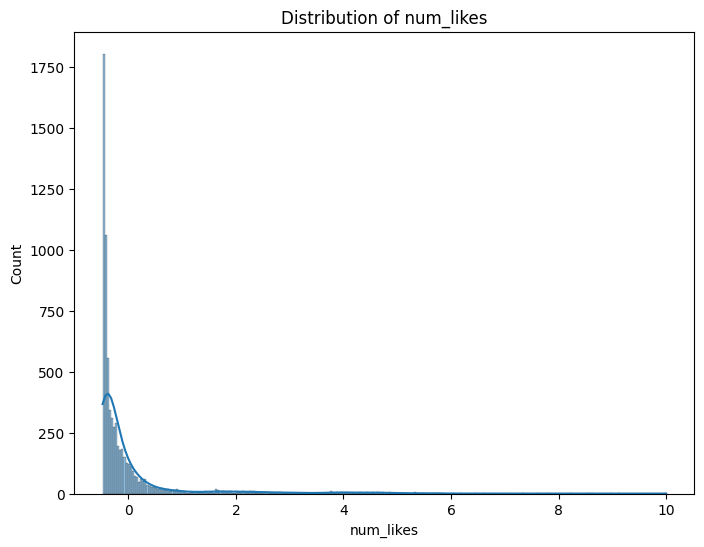

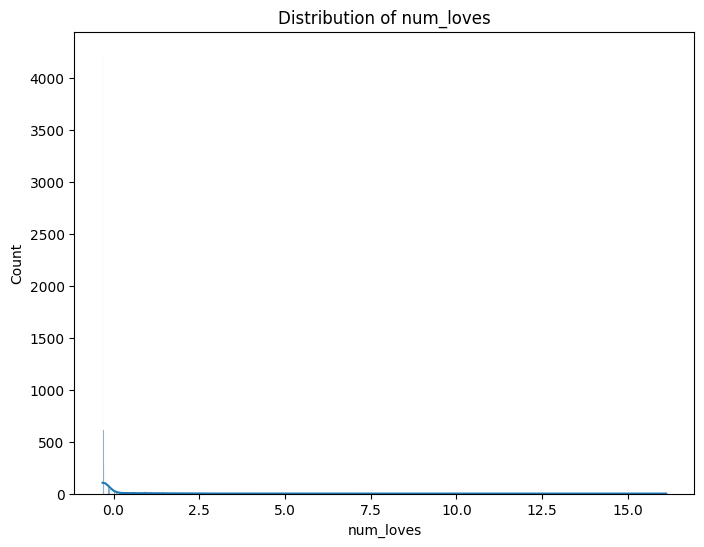

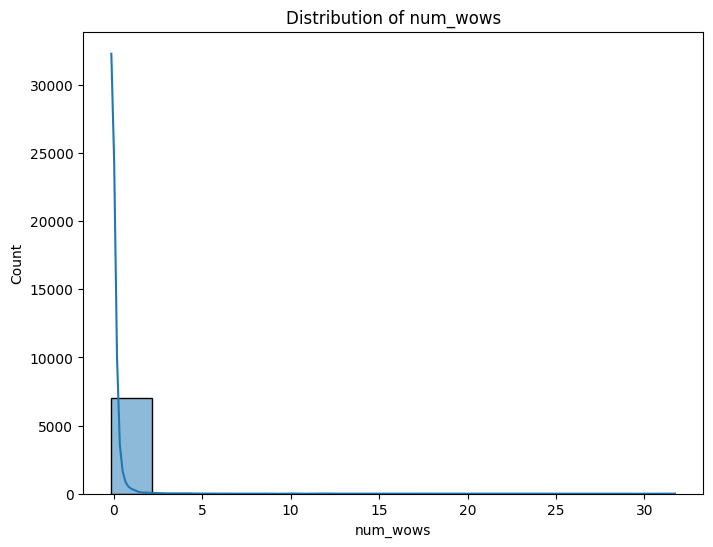

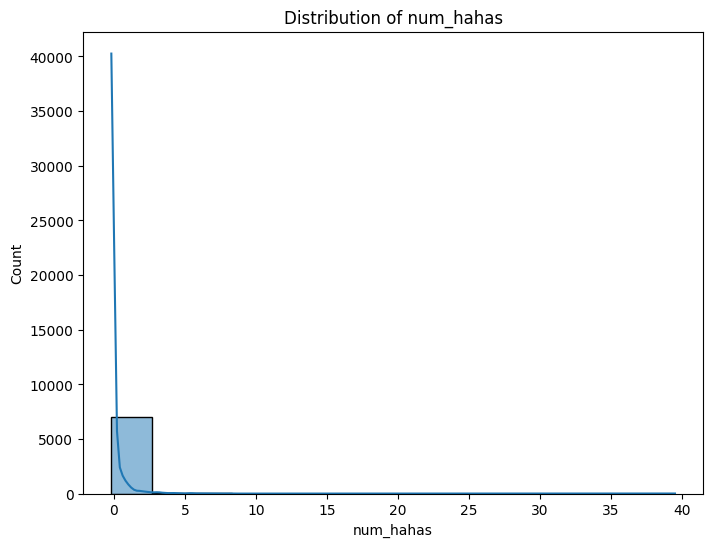

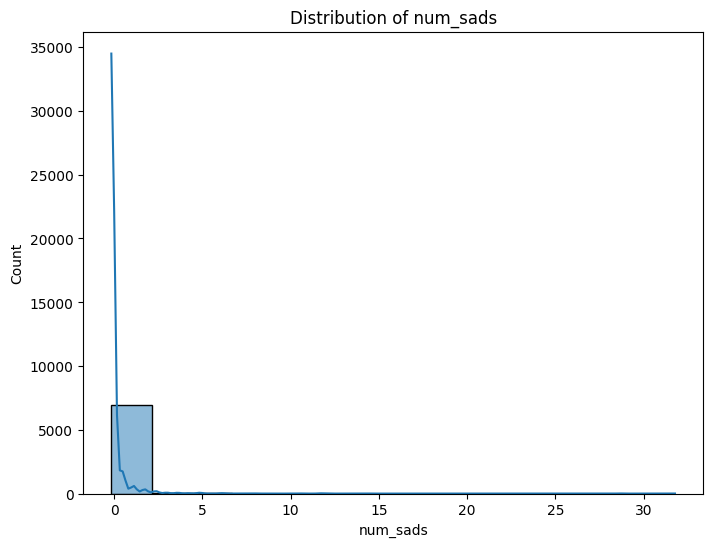

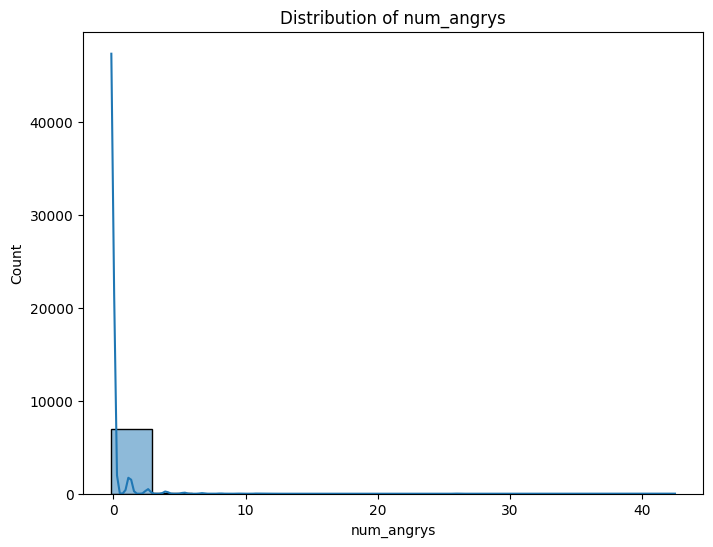

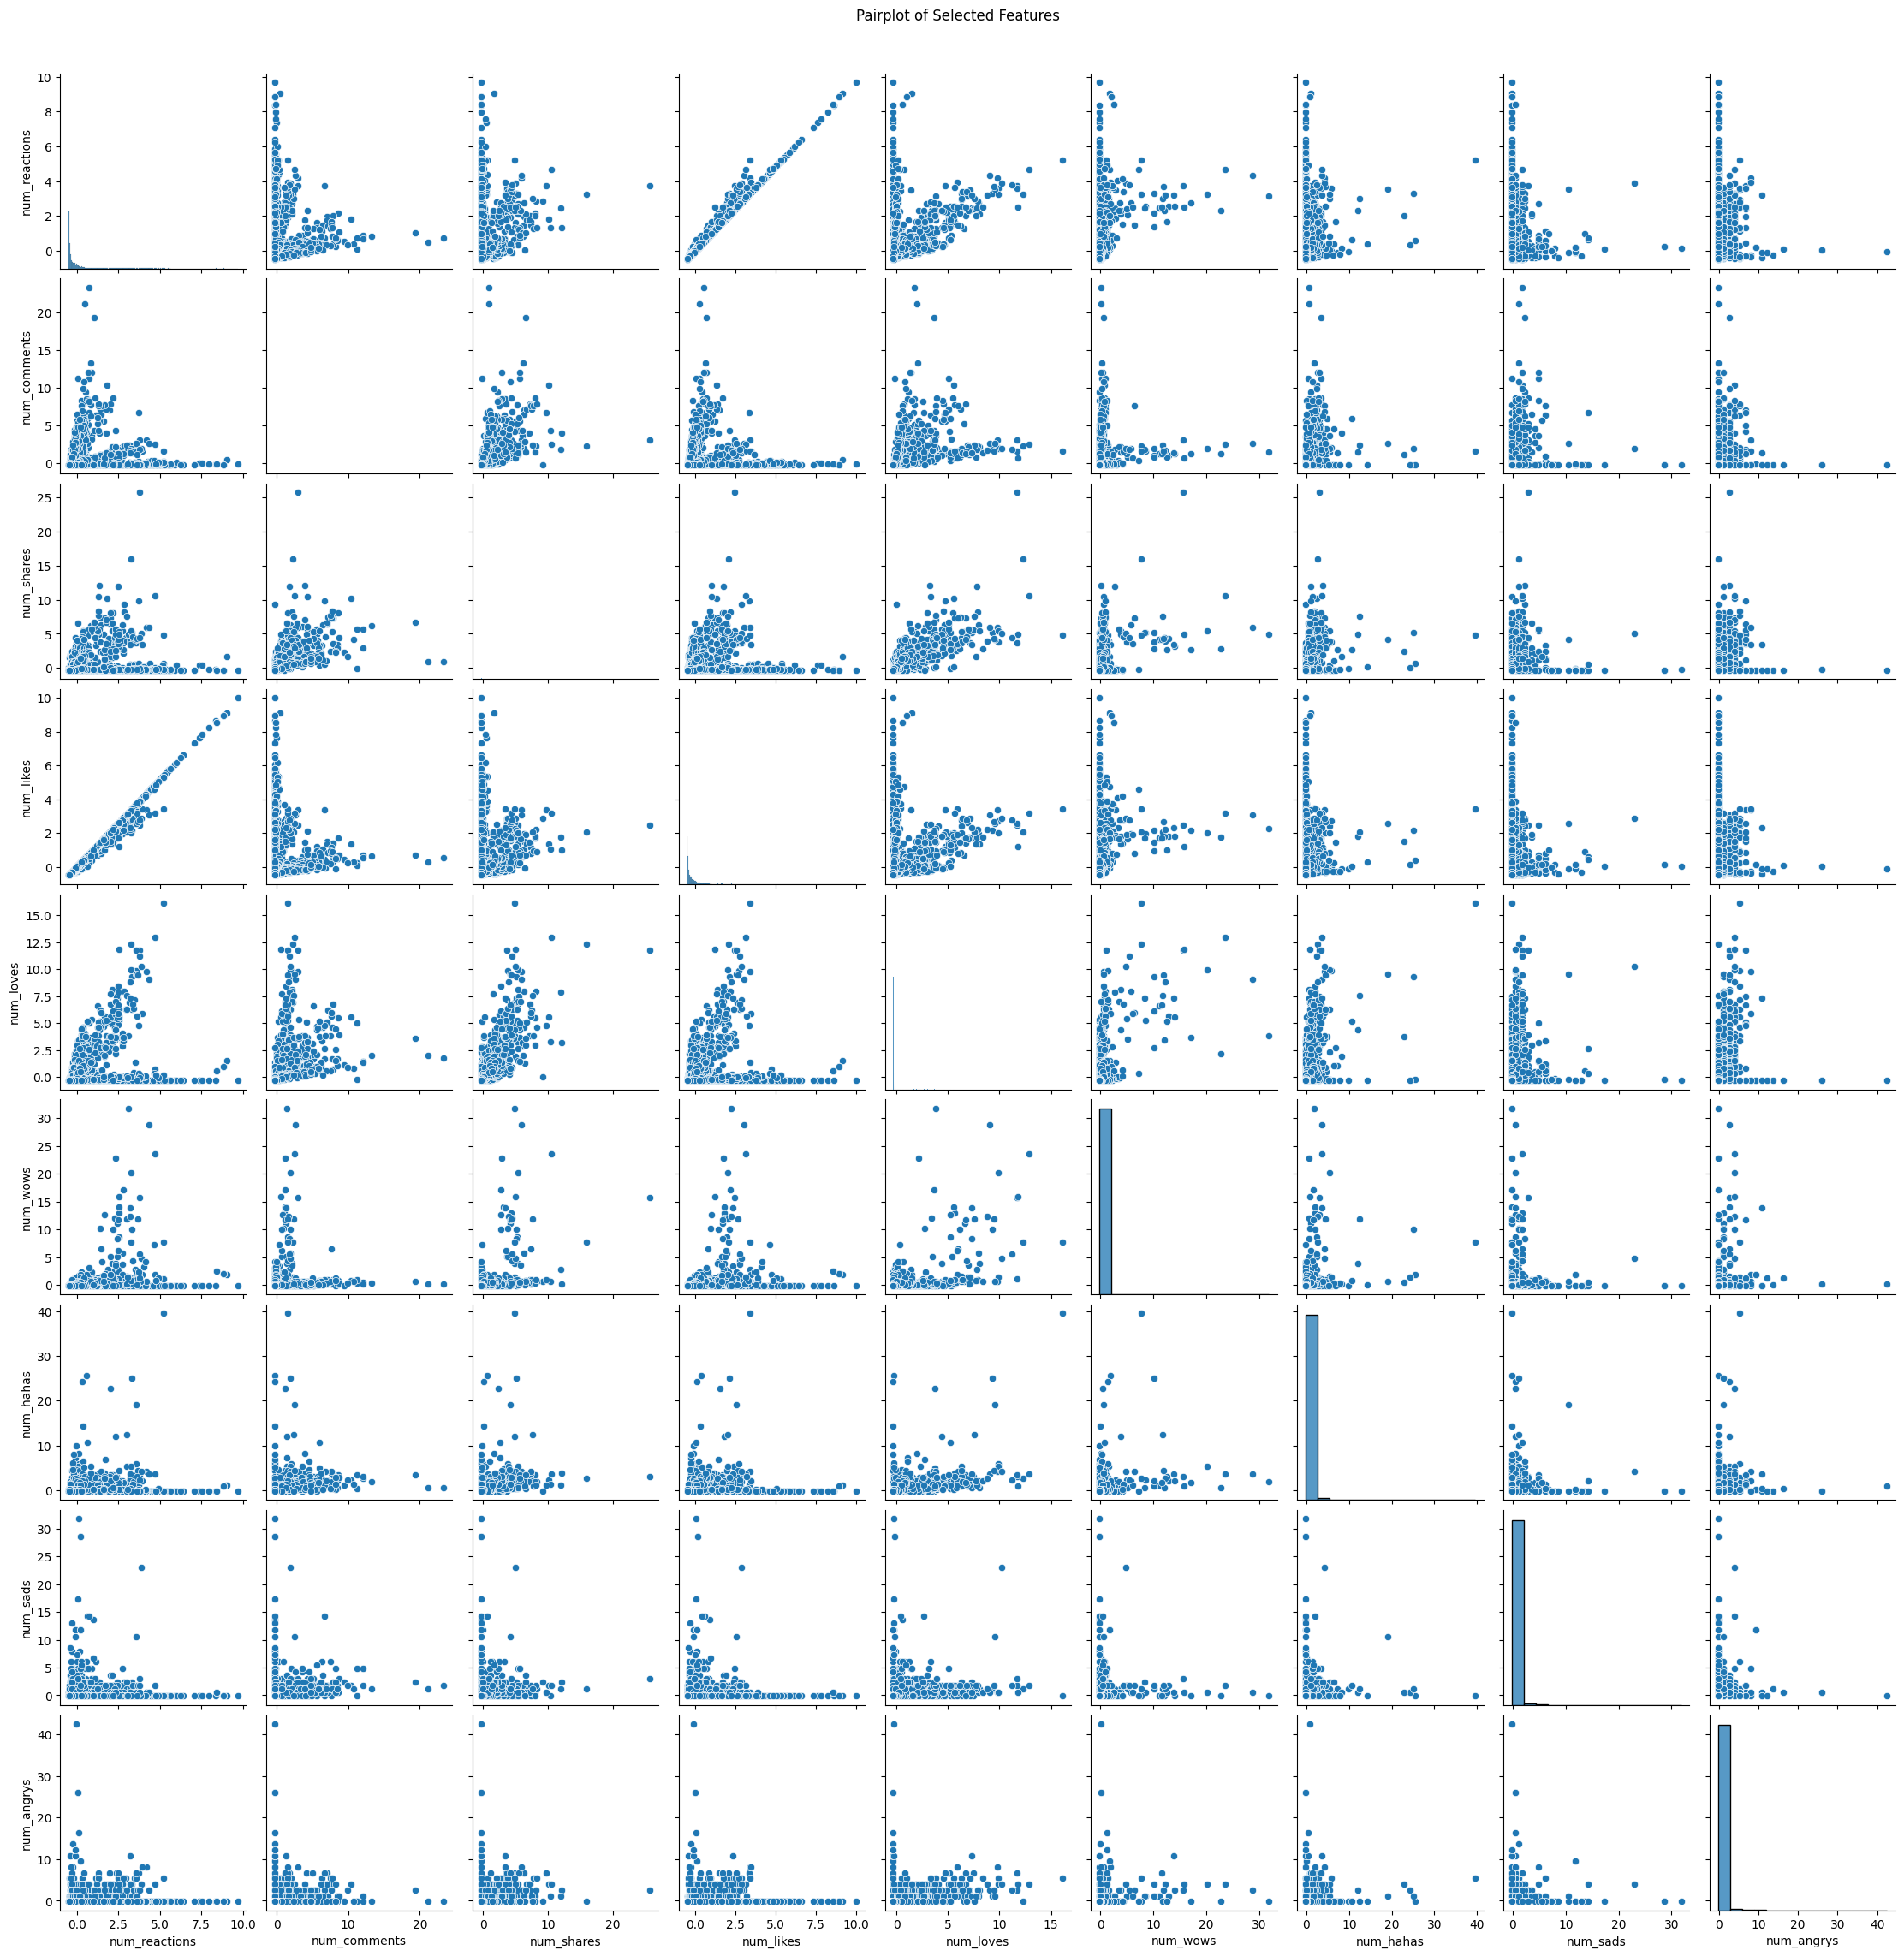

In [31]:
# EDA

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 주요 변수들의 분포 시각화
features = data_scaled.columns
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_scaled[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 주요 변수들 간의 관계 시각화 (Pairplot)
sns.pairplot(data_scaled[features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## 3. K-Means 구현 & 파라미터 튜닝

In [37]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

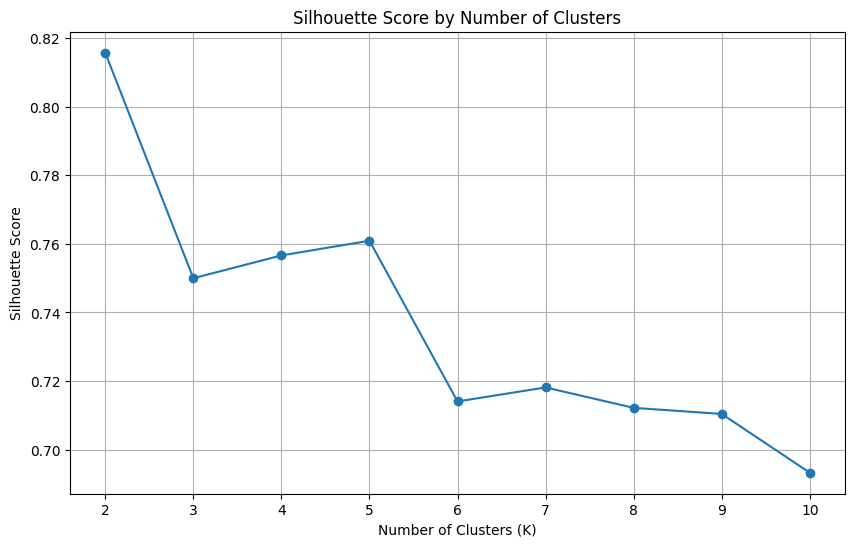

In [38]:
# 시각화

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# k가 증가할수록 감소... 2->3 급감

## 4. 평가

In [40]:
# K=2 일 때 실루엣 계수가 가장 높고 3이 되면 급감하므로 best는 2일 가능성이 높음